<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/machine-learning-bootcamp/unsupervised/04_anomaly_detection/02_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wczytanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Isolation Forset](#3)
5. [Isolation Forset - wizualizacja](#4)




### <a name='0'></a> Import bibliotek

In [1]:
print("############################################################")
print("Etap15. Odcinek: Isolation Forest - ćwiczenie")

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

############################################################
Etap15. Odcinek: Isolation Forest - ćwiczenie


### <a name='1'></a> Wczytanie danych

In [2]:
data = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/factory.csv')
data.head()
# firma produkuje narzędzia. Patrzę czy narzędzie odstaje od innych

,item_length,item_width
0,6.206380,5.618286
1,5.756649,5.921924
2,5.576329,5.792401
3,5.304950,7.235000
4,6.764064,5.965792


In [3]:
data.describe()

,item_length,item_width
count,400.000000,400.000000
mean,5.824371,5.927004
std,1.040374,1.035379
min,0.117702,0.592448
25%,5.237362,5.410112
50%,5.907650,5.984139
75%,6.464539,6.513579
max,8.091519,8.365203


### <a name='2'></a> Wizualizacja danych

In [4]:
px.scatter(data, x='item_length', y='item_width', width=950, template='plotly_dark', title='Isolation Forest')

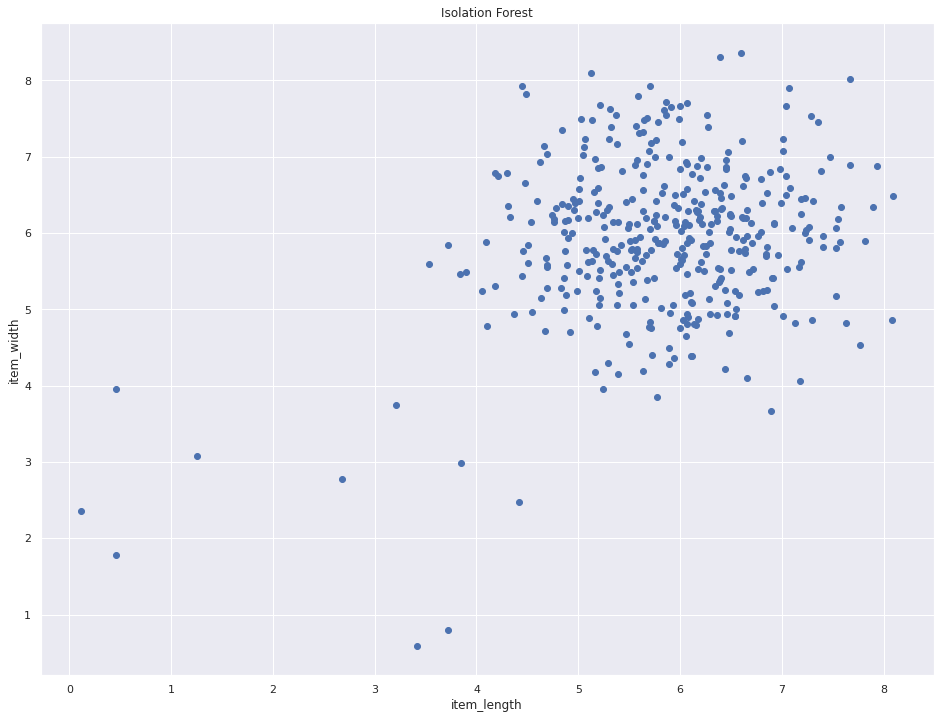

In [7]:
# sam w matplotlib bo px nie widać na github
plt.figure(figsize=(16, 12))
plt.scatter(data['item_length'], data['item_width'])
plt.title('Isolation Forest')
plt.xlabel('item_length')
plt.ylabel('item_width')
plt.show()

### <a name='3'></a> Isolation Forset

In [8]:
from sklearn.ensemble import IsolationForest

# contamination in [0, 0.05] mówi o czułości modelu, im więcej tym więcej outlierów
# Drzew jest 100 żeby liczba podziałów była uśredniona
outlier = IsolationForest(n_estimators=100, contamination=0.03)
outlier.fit(data)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.03,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [9]:
# jeśli przewiduje normalny to 1, a jeśli outlier to -1
y_pred = outlier.predict(data)
y_pred[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

### <a name='4'></a> Isolation Forset - wizualizacja

In [11]:
data['outlier_flag'] = y_pred
px.scatter(data, x='item_length', y='item_width', color='outlier_flag', width=900, template='plotly_dark',
           color_continuous_midpoint=-1, title='Isolation Forest')

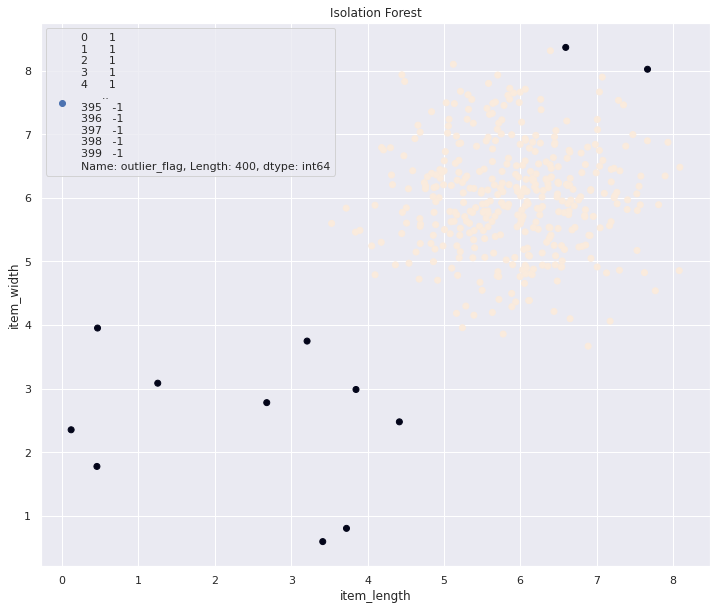

In [17]:
# sam w matplotlib bo px nie widać na github
plt.figure(figsize=(12, 10))
plt.scatter(data['item_length'], data['item_width'], c=data['outlier_flag'], label=data['outlier_flag'])
plt.title('Isolation Forest')
plt.xlabel('item_length')
plt.ylabel('item_width')
plt.legend()
plt.show()